In [1]:
import numpy as np
import pandas as pd
import glob
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_path = "./gesture/train"

In [3]:
print(os.listdir(train_path))

['0.csv', '1.csv', '2.csv', '3.csv']


In [4]:
allFiles = glob.glob("./gesture/train/*.csv")
print(allFiles)

['./gesture/train\\0.csv', './gesture/train\\1.csv', './gesture/train\\2.csv', './gesture/train\\3.csv']


In [5]:
list = []
len = []
for file in allFiles:
    csv = pd.read_csv(file,index_col=0,header=0)
    len.append(csv.shape[0])
    list.append(csv)

In [6]:
len

[2030, 2060, 2056, 2029]

In [ ]:
# 伪标签数据
csv = pd.read_csv("predict_test.csv",index_col=0,header=0)
list.append(csv)

In [7]:
df = pd.concat(list)

In [8]:
df = shuffle(df)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
263,-9.0,11.0,3.0,6.0,8.0,37.0,13.0,-2.0,3.0,-9.0,...,-7.0,-11.0,-9.0,1.0,1.0,4.0,11.0,2.0,4.0,2
1450,43.0,4.0,-3.0,0.0,-6.0,2.0,1.0,6.0,-10.0,-4.0,...,36.0,-4.0,-3.0,-5.0,-5.0,12.0,24.0,2.0,7.0,1
46,-38.0,-27.0,3.0,12.0,29.0,67.0,11.0,-31.0,-1.0,6.0,...,-8.0,-15.0,-2.0,-7.0,-3.0,15.0,-71.0,-11.0,3.0,2
719,-57.0,4.0,1.0,-2.0,-3.0,7.0,2.0,1.0,37.0,-22.0,...,9.0,-7.0,-13.0,0.0,-8.0,19.0,3.0,0.0,-2.0,2
1615,-9.0,4.0,2.0,-1.0,47.0,-3.0,4.0,-11.0,16.0,-7.0,...,-22.0,9.0,3.0,-5.0,-18.0,-11.0,1.0,20.0,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,-16.0,2.0,7.0,14.0,16.0,21.0,31.0,10.0,11.0,2.0,...,-28.0,73.0,-14.0,-7.0,-8.0,12.0,-6.0,33.0,16.0,0
2013,-2.0,0.0,3.0,-2.0,-18.0,-4.0,8.0,10.0,4.0,-2.0,...,10.0,-1.0,-3.0,-3.0,-1.0,10.0,45.0,0.0,1.0,3
1793,5.0,-1.0,-1.0,2.0,1.0,-10.0,1.0,-9.0,2.0,1.0,...,1.0,-3.0,-2.0,-3.0,-3.0,-8.0,-83.0,-10.0,12.0,3
2930,-1.0,6.0,-6.0,-2.0,-21.0,-5.0,2.0,9.0,-16.0,11.0,...,-4.0,-11.0,-27.0,-2.0,2.0,5.0,-5.0,-5.0,-6.0,2


In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

1    2060
2    2056
0    2030
3    2029
Name: 64, dtype: int64

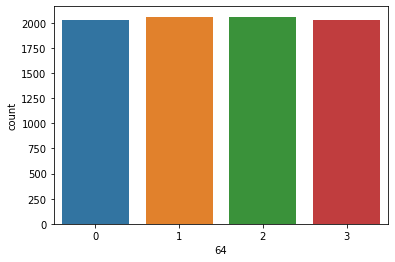

In [11]:
# 查看数据分布
g = sns.countplot(y)
y.value_counts()

In [12]:
# 空值检查
df[df.isnull().values==True]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,weights="distance")
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
classifier.score(X_test,y_test)

0.9386371744559401

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42,max_depth=10,criterion="entropy",class_weight=None)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [50]:
tree_model.score(X_test,y_test)

0.8056357662053172

In [51]:
from catboost import CatBoostClassifier

In [52]:
cat_model = CatBoostClassifier(silent=True)
cat_model.fit(X_train,y_train)

In [53]:
cat_model.score(X_test,y_test)

0.9838693617444987

In [24]:
# 标签平滑
def smooth_labels(y, smooth_factor=0.05):

    if 0 <= smooth_factor <= 1:
        y *= 1 - smooth_factor
        y += smooth_factor / y.shape[1]
    else:
        raise Exception(
            'Invalid label smoothing factor: ' + str(smooth_factor))
    return y

In [15]:
from keras.utils import np_utils

X_train = X_train.reshape((-1,8,8))
y_train = np_utils.to_categorical(y_train)
#y_train = smooth_labels(y_train,smooth_factor=0.05)
X_test = X_test.reshape((-1,8,8))
y_test = np_utils.to_categorical(y_test)
#y_test = smooth_labels(y_test,smooth_factor=0.05)

Using TensorFlow backend.


In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6540, 8, 8)
(6540, 4)
(1635, 8, 8)
(1635, 4)


In [17]:
from keras import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,BatchNormalization,Add,concatenate,Flatten

model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],8)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# model.add(Dense(units=256))
# model.add(Dropout(0.2))
model.add(Dense(units=128))
model.add(Dropout(0.2))
model.add(Dense(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=8))
model.add(Dropout(0.2))

model.add(Dense(units=4,activation="softmax"))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
# Implement Learning rate decay
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,LearningRateScheduler

def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

def schedule(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        lr = lr * 0.8
    return lr

checkpoint = ModelCheckpoint("lstm.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1)
                              #min_delta = 0.00001)
lr_scheduler = LearningRateScheduler(lr_schedule,verbose=1)

callbacks = [earlystop, checkpoint, reduce_lr]

In [19]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history_fit = model.fit(x=X_train, 
                        y=y_train, 
                        batch_size=8, 
                        epochs=30, 
                        verbose=1, 
                        validation_data=(X_test, y_test),
                        callbacks=callbacks)

Train on 6540 samples, validate on 1635 samples
Epoch 1/30
6540/6540 [==============================] - 55s 8ms/step - loss: 0.0535 - acc: 0.9853 - val_loss: 0.1721 - val_acc: 0.9682

Epoch 00001: val_loss did not improve from 0.14329
Epoch 2/30
6540/6540 [==============================] - 54s 8ms/step - loss: 0.0463 - acc: 0.9876 - val_loss: 0.1766 - val_acc: 0.9688

Epoch 00002: val_loss did not improve from 0.14329
Epoch 3/30
6540/6540 [==============================] - 51s 8ms/step - loss: 0.0448 - acc: 0.9864 - val_loss: 0.1788 - val_acc: 0.9670

Epoch 00003: val_loss did not improve from 0.14329
Epoch 4/30
6540/6540 [==============================] - 51s 8ms/step - loss: 0.0409 - acc: 0.9873 - val_loss: 0.1745 - val_acc: 0.9682

Epoch 00004: val_loss did not improve from 0.14329

Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 5/30
6540/6540 [==============================] - 51s 8ms/step - loss: 0.0366 - acc: 0.9894 - val_loss: 0.1718 - val

### 预测

In [31]:
test_path = "./gesture/test/test.csv"
test_csv = pd.read_csv(test_path,index_col=None,header=None)

In [32]:
test_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-6.0,0.0,-1.0,-3.0,-3.0,-6.0,-2.0,-4.0,-4.0,-2.0,...,-7.0,-4.0,-12.0,0.0,0.0,0.0,2.0,11.0,6.0,-13.0
1,-11.0,-5.0,-4.0,0.0,18.0,18.0,-5.0,4.0,-9.0,-4.0,...,11.0,3.0,6.0,-12.0,-5.0,-9.0,-19.0,6.0,-4.0,18.0
2,-10.0,-4.0,-7.0,0.0,-5.0,-4.0,-40.0,33.0,0.0,-8.0,...,-66.0,-33.0,12.0,-2.0,-4.0,-6.0,-9.0,-8.0,107.0,7.0
3,1.0,-2.0,2.0,5.0,-1.0,-14.0,-2.0,-1.0,-24.0,-2.0,...,1.0,3.0,-3.0,0.0,-4.0,-8.0,-13.0,-20.0,-4.0,1.0
4,-35.0,-37.0,-17.0,10.0,-3.0,-1.0,7.0,-13.0,52.0,5.0,...,-6.0,12.0,8.0,-4.0,1.0,-1.0,-15.0,-3.0,-30.0,-11.0


In [33]:
predict_x = scaler.transform(test_csv)

In [34]:
predict_x= predict_x.reshape((-1,8,8))

In [35]:
pred_y = model.predict(predict_x)

In [36]:
pred_y 

array([[0.01033855, 0.00919515, 0.01458755, 0.9658788 ],
       [0.00824677, 0.00981444, 0.97341985, 0.00851895],
       [0.97412735, 0.00901643, 0.00741178, 0.00944448],
       ...,
       [0.00984068, 0.00912976, 0.01856433, 0.9624652 ],
       [0.9743472 , 0.00888243, 0.0073602 , 0.00941014],
       [0.01032716, 0.96954054, 0.01191293, 0.00821946]], dtype=float32)

In [37]:
predict = np.argmax(pred_y,axis=1)

In [38]:
predict.shape

(3503,)

In [39]:
id = np.arange(predict.shape[0])+1
df = pd.DataFrame({"id":id,"predict":predict})

In [40]:
df.to_csv("submit13.csv",index=None,header=None)

In [54]:
# 伪标签
res_csv = pd.read_csv("submit7_98.17.csv",names=["id","predict"])
res_predict = res_csv["predict"]

In [55]:
test_csv

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-6.0,0.0,-1.0,-3.0,-3.0,-6.0,-2.0,-4.0,-4.0,-2.0,...,-7.0,-4.0,-12.0,0.0,0.0,0.0,2.0,11.0,6.0,-13.0
1,-11.0,-5.0,-4.0,0.0,18.0,18.0,-5.0,4.0,-9.0,-4.0,...,11.0,3.0,6.0,-12.0,-5.0,-9.0,-19.0,6.0,-4.0,18.0
2,-10.0,-4.0,-7.0,0.0,-5.0,-4.0,-40.0,33.0,0.0,-8.0,...,-66.0,-33.0,12.0,-2.0,-4.0,-6.0,-9.0,-8.0,107.0,7.0
3,1.0,-2.0,2.0,5.0,-1.0,-14.0,-2.0,-1.0,-24.0,-2.0,...,1.0,3.0,-3.0,0.0,-4.0,-8.0,-13.0,-20.0,-4.0,1.0
4,-35.0,-37.0,-17.0,10.0,-3.0,-1.0,7.0,-13.0,52.0,5.0,...,-6.0,12.0,8.0,-4.0,1.0,-1.0,-15.0,-3.0,-30.0,-11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,-3.0,-10.0,-4.0,-35.0,40.0,54.0,17.0,3.0,-12.0,-4.0,...,11.0,-12.0,-36.0,-8.0,2.0,-18.0,8.0,-19.0,-7.0,12.0
3499,-34.0,-8.0,1.0,3.0,-16.0,32.0,23.0,-16.0,38.0,3.0,...,-17.0,-14.0,-16.0,0.0,-2.0,8.0,17.0,32.0,-3.0,-40.0
3500,-16.0,-5.0,-10.0,-24.0,-11.0,10.0,10.0,-5.0,2.0,1.0,...,1.0,-10.0,3.0,-3.0,-5.0,-13.0,-17.0,-71.0,-22.0,10.0
3501,-13.0,3.0,2.0,-2.0,-5.0,-6.0,10.0,3.0,16.0,-14.0,...,-61.0,-6.0,6.0,-4.0,-8.0,-5.0,0.0,-13.0,-29.0,-7.0


In [56]:
test_csv["predict"] = res_predict

In [57]:
test_csv

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,predict
0,-6.0,0.0,-1.0,-3.0,-3.0,-6.0,-2.0,-4.0,-4.0,-2.0,...,-4.0,-12.0,0.0,0.0,0.0,2.0,11.0,6.0,-13.0,3
1,-11.0,-5.0,-4.0,0.0,18.0,18.0,-5.0,4.0,-9.0,-4.0,...,3.0,6.0,-12.0,-5.0,-9.0,-19.0,6.0,-4.0,18.0,2
2,-10.0,-4.0,-7.0,0.0,-5.0,-4.0,-40.0,33.0,0.0,-8.0,...,-33.0,12.0,-2.0,-4.0,-6.0,-9.0,-8.0,107.0,7.0,0
3,1.0,-2.0,2.0,5.0,-1.0,-14.0,-2.0,-1.0,-24.0,-2.0,...,3.0,-3.0,0.0,-4.0,-8.0,-13.0,-20.0,-4.0,1.0,1
4,-35.0,-37.0,-17.0,10.0,-3.0,-1.0,7.0,-13.0,52.0,5.0,...,12.0,8.0,-4.0,1.0,-1.0,-15.0,-3.0,-30.0,-11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,-3.0,-10.0,-4.0,-35.0,40.0,54.0,17.0,3.0,-12.0,-4.0,...,-12.0,-36.0,-8.0,2.0,-18.0,8.0,-19.0,-7.0,12.0,3
3499,-34.0,-8.0,1.0,3.0,-16.0,32.0,23.0,-16.0,38.0,3.0,...,-14.0,-16.0,0.0,-2.0,8.0,17.0,32.0,-3.0,-40.0,3
3500,-16.0,-5.0,-10.0,-24.0,-11.0,10.0,10.0,-5.0,2.0,1.0,...,-10.0,3.0,-3.0,-5.0,-13.0,-17.0,-71.0,-22.0,10.0,3
3501,-13.0,3.0,2.0,-2.0,-5.0,-6.0,10.0,3.0,16.0,-14.0,...,-6.0,6.0,-4.0,-8.0,-5.0,0.0,-13.0,-29.0,-7.0,0


In [58]:
test_csv.to_csv("predict_test.csv")

### Tricks

- 伪标签；

- 训练集重复；

### 知识部分

### 1 关于Boosting算法

Boosting的思想是一种迭代的方法，每一次训练的时候都更加关系分类错误的样例，给这些分类错误的样例增加更大的权重，下一次的迭代的目标就是能够更容易的辨别出上一轮分类错误的样例。最后将这些弱分类器进行加权相加。

 - 2014年3月，XGBOOST最早作为研究项目，由陈天奇提出
 - 2017年1月，微软发布首个稳定版LightGBM
 - 2017年4月，俄罗斯顶尖技术公司Yandex开源CatBoost

### 2 多层LSTM

使用LSTM搭建多层LSTM网络时，只需使用`Sequential()`进行堆叠即可。在进行多层LSTM网络时，需要注意以下几点：
 - 1.需要对第一层的LSTM指定`input_shape`参数。
 - 2.将前N-1层LSTM的`return_sequence`设置为`True`,保证每一层都会向下一层传播所有时间步长上的预测，同时保证最后一层的`return_sequence`为`False`（如果只需要最后一个输出的话）。
 - 3.其实，在第二层时，不用指定`input_shape`,因为根据上一层的`output_dim`和当前层的`output_dim`可以得出当前层中权重矩阵的大小。

### 3 Label-Smoothing

`核心思想：通过给类别标签加入confusion来防止过拟合`

`Label smoothing: 本质上就是让标签变得平滑，让预测结果不那么相信所属的类别，起到增强鲁棒性的作用。`

`Label-Smoothing`:就是让softmax不那么相信某一类的数据，增强泛化性。主要操作，在制作标签的时候，属于哪一类就让网络90%相信它，其它10%平均相信。

和`focal loss`的想法不太一样，focal loss是让分错的东西对网络多做点贡献，学的比较好的就少做点贡献。

关于focal loss的文章：https://blog.csdn.net/MrR1ght/article/details/93649259                                                  https://blog.csdn.net/u014380165/article/details/77019084

对于分类问题，尤其是多类别分类问题中，常常把类别向量做成`one-hot vector(独热向量)`。

简单来说，就是对于多分类向量，计算机往往用[0,1,3]等此离散的、随机的而非有序（连续）的向量表示，而one-hot vector对应的向量便可表示为[0,1,0],即对于长度为n的数组，只有一个元素是1，其余都为0.因此表征我们已知样本属于某一类别的概率是为1的确定事件，属于其他类别的概率则均为0、

但`one-hot带来问题:`对于损失函数，我们需要用预测概率去拟合真实概率，而拟合one-hot的真实概率函数会带来两个问题：
- 无法保证模型的泛化能力，容易造成过拟合；
- 全概率和0概率鼓励所属类别和其它类别之间的差距尽可能加大，而由梯度有界可知，这种情况很难adapt。会造成模型过于相信预测的类别。

而使用`label smoothing可以解决这个问题：`

<img src="https://img2018.cnblogs.com/blog/1464331/201809/1464331-20180925150511737-1589123451.png">

原理：对于以Dirac函数分布的真实标签，我们将它变成分为两部分获得（替换）
- 第一部分：将原本Dirac分布的标签变量替换为(1 - ϵ)的Dirac函数；
- 第二部分：以概率 ϵ ，在u(k)u(k) 中份分布的随机变量。

In [ ]:
def label_smoothing(inputs, epsilon=0.1):
    K = inputs.get_shape().as_list()[-1]    # number of channels
    return ((1-epsilon) * inputs) + (epsilon / K)

Label smoothing的文章：
https://arxiv.org/abs/1512.00567   
https://blog.csdn.net/Neveer/article/details/91646657 
https://blog.csdn.net/edogawachia/article/details/78552257